In [37]:
import fastai
from ddgs import DDGS
from fastcore.all import *
from fastai.vision.all import *
import time
import json
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
"""
Helper Function for collecting data and downloading it
"""

# def search_images(keywords, max_images=200):
#   time.sleep(10)
#   return L(DDGS().images(query=keywords, max_results=max_images)).itemgot('image')

# # forests = search_images("forests")


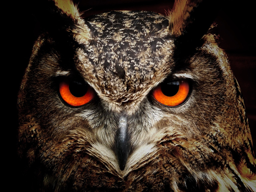

In [35]:
Image.open("/Users/siddharthnarolia/Projects/Github/DLPractise/notebooks/datasets/birds/001_owl-50267_1280.jpg").to_thumb(256,256)

In [38]:
"""
setting up size and labels for images
"""

path = Path("datasets")

for o in ["birds", "dogs"]:
    resize_images(path/o, max_size=400, dest=path/o)

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

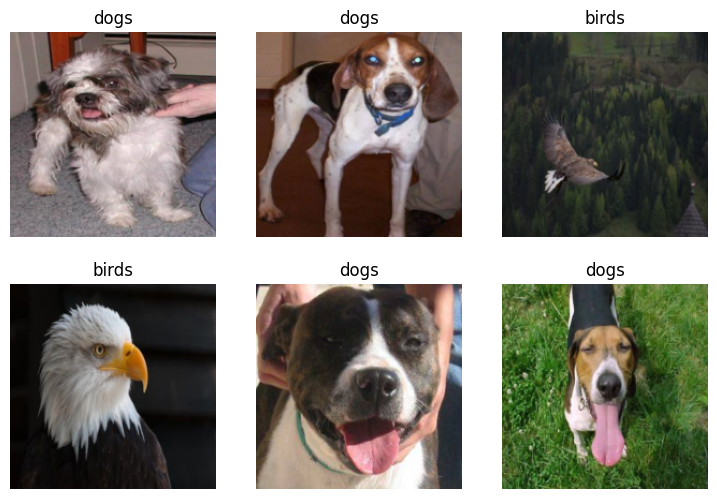

In [39]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [40]:
"""
Setting up learner
"""

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/siddharthnarolia/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:01<00:00, 32.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.623987,0.120745,0.029869,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.115102,0.026036,0.003584,00:27
1,0.049606,0.002946,0.000000,00:26
2,0.024761,0.002379,0.000000,00:26


In [45]:
is_bird, _ , probs = learn.predict(PILImage.create("/Users/siddharthnarolia/Projects/Github/DLPractise/notebooks/datasets/birds/predict/bird_1.jpg"))

print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: birds.
Probability it's a bird: 1.0000
